# ATO Community Lithium survey - Quantitative Analysis

## Import packages

In [1]:
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# for plotting purposes
%matplotlib inline

## Import Beta Loop11 Scripts

In [2]:
import loop11_functions as beta
%run loop11_functions.py

## Import data

In [3]:
clean_df = pd.read_csv('ato-community_lithium_clean.csv')
clean_df

,Q1 What was the purpose of your visit to the ATO Community?,Q2 Were you able to find what you were looking for?,"Q3 [If Q2 = Yes ] If your visit had not been successful, what would you have done next?","Q4 [If Q2 = No] Since you didn't find what you were looking for, what are you going to do next?",Q5 How would you rate your overall experience on ATO Community?,Any other feedback?
0,search,no,NaN,Call,3,NaN
1,Find out more,yes,Ask,NaN,1,If this were to be rolled out by the ATO into ...
2,Find out more,yes,Ask,NaN,2,NaN
3,Ask,no,NaN,Ask,2,NaN
4,Find out more,yes,ato.gov.au,NaN,3,NaN
5,Ask,yes,Call,NaN,2,NaN
6,Find out more,no,NaN,Other,5,I agree with one of the other posters - How ca...
7,Find out more,no,NaN,ato.gov.au,2,NaN
8,Other,yes,Other,NaN,2,NaN
9,Find out more,yes,Ask,NaN,3,I regard this as a great concept. Being invol...


In [5]:
# Delare variable to store folder file location
folder = "Graphs/standard_graphs/"

In [4]:
N = len(clean_df)
N

90

In [6]:
list(clean_df.columns.values) # For reference later when picking out data in specific column

['Q1 What was the purpose of your visit to the ATO Community?',
 'Q2 Were you able to find what you were looking for?',
 'Q3 [If Q2 = Yes ] If your visit had not been successful, what would you have done next?',
 "Q4 [If Q2 = No] Since you didn't find what you were looking for, what are you going to do next?",
 'Q5 How would you rate your overall experience on ATO Community?',
 'Any other feedback?']

### Replace answer key with full answers

In [37]:
full_answers = []
full_answers.append(clean_df['Q1 What was the purpose of your visit to the ATO Community?'].replace({'search': 'To search for an answer to a tax or super question without asking the Community',
                                                                                                  'Ask':'To ask the Community a question about tax or super',
                                                                                                  'Find out more':'To find out what ATO Community is',
                                                                                                   'Participate':'Looking for a question I can answer or a discussion I can participate in'                                                                                                   
                                                                                                  }, regex=True))
full_answers.append(clean_df['Q3 [If Q2 = Yes ] If your visit had not been successful, what would you have done next?'].replace({'Call':'Phoned us for assistance',
                                                                                                                                 'Alex':'Asked Alex  for help',
                                                                                                                                 'ato.gov.au':'Go to ato.gov.au',
                                                                                                                                 'Ask':'Asked the ATO Community a question'}, regex=True))
full_answers.append(clean_df["Q4 [If Q2 = No] Since you didn't find what you were looking for, what are you going to do next?"].replace({'Call':'Phone us',
                                                                                                                                 'Alex':'Ask Alex  for help',
                                                                                                                                 'ato.gov.au':'Go to ato.gov.au',
                                                                                                                                 'Ask':'Ask the ATO Community a question'}, regex=True))
full_answers.append(clean_df['Q5 How would you rate your overall experience on ATO Community?'].replace({1:'1. Very satisfied', 2:'2. Satisfied',3:'3. OK',4:'4. Not satisfied',5:'5. Very unsatisfied'}, regex=True))


full_answers_df = pd.concat(full_answers, axis=1)
full_answers_df

,Q1 What was the purpose of your visit to the ATO Community?,"Q3 [If Q2 = Yes ] If your visit had not been successful, what would you have done next?","Q4 [If Q2 = No] Since you didn't find what you were looking for, what are you going to do next?",Q5 How would you rate your overall experience on ATO Community?
0,To search for an answer to a tax or super ques...,NaN,Phone us,3. OK
1,To find out what ATO Community is,Asked the ATO Community a question,NaN,1. Very satisfied
2,To find out what ATO Community is,Asked the ATO Community a question,NaN,2. Satisfied
3,To ask the Community a question about tax or s...,NaN,Ask the ATO Community a question,2. Satisfied
4,To find out what ATO Community is,Go to ato.gov.au,NaN,3. OK
5,To ask the Community a question about tax or s...,Phoned us for assistance,NaN,2. Satisfied
6,To find out what ATO Community is,NaN,Other,5. Very unsatisfied
7,To find out what ATO Community is,NaN,Go to ato.gov.au,2. Satisfied
8,Other,Other,NaN,2. Satisfied
9,To find out what ATO Community is,Asked the ATO Community a question,NaN,3. OK


## Questions

### Q1 What was the purpose of your visit to the ATO Community?

SAMPLE SIZE: 90 (Q1 What was the purpose of your visit to the ATO Community?)
TOTAL %: 0.9999999999999999 (Q1 What was the purpose of your visit to the ATO Community?)


,Q1 What was the purpose of your visit to the ATO Community? (N),Q1 What was the purpose of your visit to the ATO Community? (%)
Looking for a question I can answer or a discussion I can participate in,4,0.044444
Other,15,0.166667
To ask the Community a question about tax or super,6,0.066667
To find out what ATO Community is,54,0.600000
To search for an answer to a tax or super question without asking the Community,11,0.122222


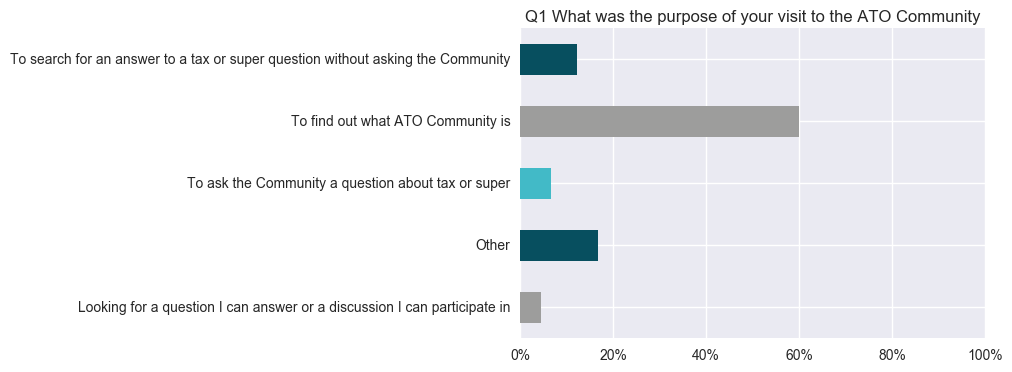

In [38]:
single_answer(full_answers_df, ['Q1 What was the purpose of your visit to the ATO Community?'], beta.grapher_horizontal, folder)

### Q2 Were you able to find what you were looking for?

SAMPLE SIZE: 90 (Q2 Were you able to find what you were looking for?)
TOTAL %: 1.0 (Q2 Were you able to find what you were looking for?)


,Q2 Were you able to find what you were looking for? (N),Q2 Were you able to find what you were looking for? (%)
no,17,0.188889
yes,73,0.811111


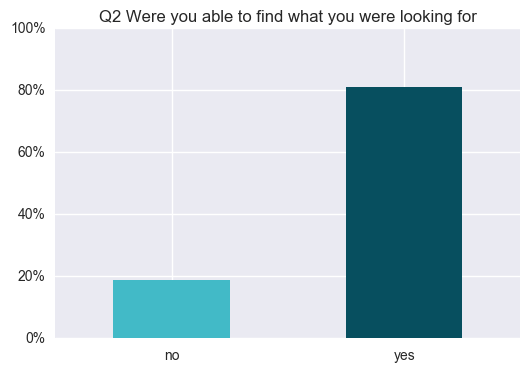

In [39]:
q2 = ['Q2 Were you able to find what you were looking for?']
beta.single_answer(clean_df, q2, beta.grapher, folder)

### Q3 [If Q2 = Yes ] If your visit had not been successful, what would you have done next?

SAMPLE SIZE: 73 (Q3 [If Q2 = Yes ] If your visit had not been successful, what would you have done next?)
TOTAL %: 1.0 (Q3 [If Q2 = Yes ] If your visit had not been successful, what would you have done next?)


,"Q3 [If Q2 = Yes ] If your visit had not been successful, what would you have done next? (N)","Q3 [If Q2 = Yes ] If your visit had not been successful, what would you have done next? (%)"
Asked the ATO Community a question,16,0.219178
Go to ato.gov.au,30,0.410959
Other,18,0.246575
Phoned us for assistance,9,0.123288


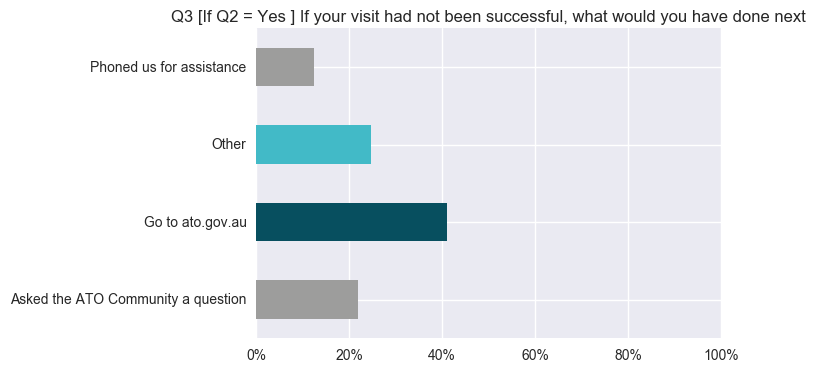

In [40]:
q3 = ['Q3 [If Q2 = Yes ] If your visit had not been successful, what would you have done next?']
beta.single_answer(full_answers_df, q3, beta.grapher_horizontal, folder)

### Q4 [If Q2 = No] Since you didn't find what you were looking for, what are you going to do next?

SAMPLE SIZE: 17 (Q4 [If Q2 = No] Since you didn't find what you were looking for, what are you going to do next?)
TOTAL %: 1.0 (Q4 [If Q2 = No] Since you didn't find what you were looking for, what are you going to do next?)


,"Q4 [If Q2 = No] Since you didn't find what you were looking for, what are you going to do next? (N)","Q4 [If Q2 = No] Since you didn't find what you were looking for, what are you going to do next? (%)"
Ask the ATO Community a question,2,0.117647
Ask the ATO Community a question Alex for help,2,0.117647
Go to ato.gov.au,6,0.352941
Other,5,0.294118
Phone us,2,0.117647


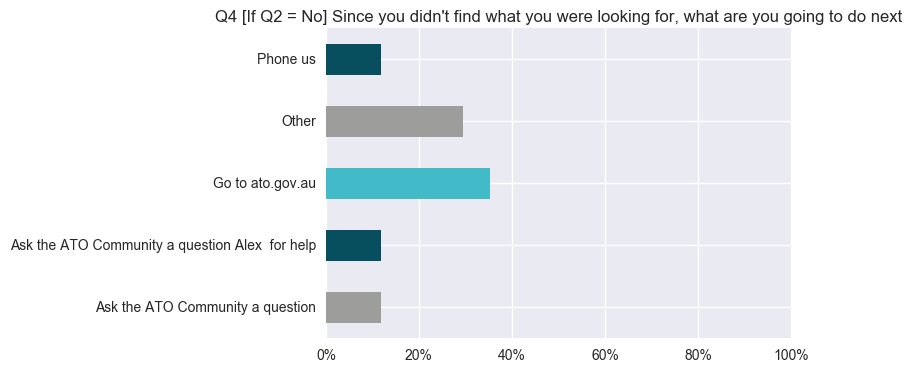

In [41]:
q4 = ["Q4 [If Q2 = No] Since you didn't find what you were looking for, what are you going to do next?"]
beta.single_answer(full_answers_df, q4, beta.grapher_horizontal, folder)

### Q5 How would you rate your overall experience on ATO Community?

SAMPLE SIZE: 90 (Q5 How would you rate your overall experience on ATO Community?)
TOTAL %: 0.9999999999999998 (Q5 How would you rate your overall experience on ATO Community?)


,Q5 How would you rate your overall experience on ATO Community? (N),Q5 How would you rate your overall experience on ATO Community? (%)
1. Very satisfied,12,0.133333
2. Satisfied,37,0.411111
3. OK,33,0.366667
4. Not satisfied,4,0.044444
5. Very unsatisfied,4,0.044444


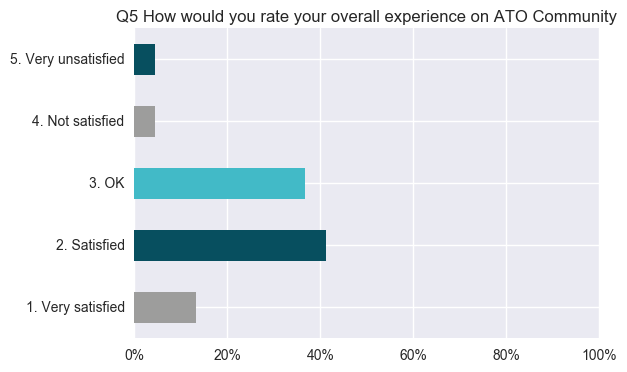

In [44]:
q5 = ["Q5 How would you rate your overall experience on ATO Community?"]
beta.single_answer(full_answers_df, q5, beta.grapher_horizontal, folder)

### Any other feedback?

In [45]:
beta.other_responses(clean_df, 'Any other feedback?')

NUMBER OF RESPONSES:  32


"If this were to be rolled out by the ATO into a 'production' environment, it would be great as long as it was moderated for off point posters. Otherwise, a really useful facility to have going. "

'I agree with one of the other posters - How can someone rely on the information provided in this forum to assist them in their tax affairs?'

'I regard this as a great concept.  Being involved in another very active community forum or Reckon Accounts, it is possible to learn things that were either not known or forgotten as well as being able to help others.  As long as there is a moderator who can correct any wrong answers, the system should work very well.'

'no'

'No'

'Looking forward to seeing more community members asking and answering questions. '

'none at the moment'

'this type of general information information does not interest me'

'UFN'

'No. I have no other feedback ideas.'

'All good '

'not at the moment'

'first  time  that  i  have  connected'

'No'

'I Think the page is too spacey.  I had to scroll a lot to get the information from several different people who had posted.  Can you condense the page.  It would make it easier'

'thanks'

'REMOVE the note "We no longer support Internet Explorer v10 and older. Upgrade to a newer version or use a different browser. " as I am using IE 11 already\r\nPlus as a Professional I hate DR GOOGLE the same way Medical Practitioners do'

'nothing yet as I have just started'

"The community will be fantastic to use if responses are timely, and I'd also suggest different sections for different initiatives e.g. Federal Budget, SuperStream"

'not very useful could not get answer\r\n'

'Will attempt it for real questions, not in response to email request.'

'Not at this stage'

'Add it to the ato app'

'Effectiveness in using busuness language rather than ATO-speak will be the deciding factor!'

"Why didn't the ATO question all the abnormal suspicious money laundered / fraudulent cheques / cash laundered to high risk countries over years - enabling criminals to destroy thousands of lives? "

'Are people able to rely on advice given in this forum?'

'No'

'no'

"I don't understand the credentials behind ATO Certified and Kudosed authors. While I inherently trust the ATO and the site, I did wonder, about the process of how authors are authenticated, other than via 'earning' badges"

"If the Community includes official responses from the ATO, then it's very useful.  Otherwise, it's like any other unvetted internet forum, and I would not use any of the content due to questions over reliability."

"Why don't you use Qualtrics to do your research and collect this type of feedback?"

"Fix it so this survey doesn't come up on top of the community window - it should come up behind it"